<a href="https://colab.research.google.com/github/hauduong05/CNN-models/blob/main/Lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

In [ ]:
# read data

path = '/content/drive/MyDrive/data'

train = torchvision.datasets.FashionMNIST(root=path, train=True, transform=transforms.ToTensor(), download=True)
test = torchvision.datasets.FashionMNIST(root=path, train=False, transform=transforms.ToTensor())

In [ ]:
# visualize data

img, label = train[0]
img = img.view(28, 28)
plt.imshow(img)

In [ ]:
# initial hyper parameters

batch_size = 64
learning_rate = 1e-2
num_epochs = 10

In [ ]:
# prepare data

labels = train.classes

train, valid = torch.utils.data.random_split(train, [50000, 10000])
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True)

In [ ]:
# build model

class Lenet(nn.Module):
  def __init__(self):
    super(Lenet, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.pool = nn.AvgPool2d(2, 2)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = self.pool(F.sigmoid(self.conv1(x)))
    x = self.pool(F.sigmoid(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    x = self.fc3(x)
    return x

model = Lenet()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# train and evaluate

train_loss_hist = []
train_acc_hist = []
valid_loss_hist = []
valid_acc_hist = []

for epoch in range(num_epochs):
  train_loss, train_corr, val_loss, val_corr = 0, 0, 0, 0
  for data, label in train_loader:
    data = data.view(-1, 1, 28, 28)
    out = model(data)
    l = loss_fn(out, label)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    _, pred = torch.max(out, 1)
    train_loss += l
    train_corr += torch.sum(pred == label)
  
  with torch.no_grad():
    for data, label in valid_loader:
      data = data.view(-1, 1, 28, 28)
      out = model(data)
      _, pred = torch.max(out, 1)
      l = loss_fn(out, label)
      val_loss += l
      val_corr += torch.sum(pred == label)
  
  train_loss = train_loss / len(train_loader)
  train_acc = train_corr / len(train)
  val_loss = val_loss / len(valid_loader)
  val_acc = val_corr / len(valid)

  train_loss_hist.append(train_loss)
  train_acc_hist.append(train_acc)
  valid_loss_hist.append(val_loss)
  valid_acc_hist.append(val_acc)

  print(f'epoch {epoch+1} : loss = {train_loss:.3f} - acc = {train_acc:.3f} - val_loss = {val_loss:.3f} - val_acc = {val_acc:.3f}')

torch.save(model, 'model.pth') 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 1 : loss = 2.305 - acc = 0.100 - val_loss = 2.303 - val_acc = 0.095
epoch 2 : loss = 2.304 - acc = 0.100 - val_loss = 2.304 - val_acc = 0.099
epoch 3 : loss = 2.304 - acc = 0.101 - val_loss = 2.303 - val_acc = 0.101
epoch 4 : loss = 2.304 - acc = 0.096 - val_loss = 2.303 - val_acc = 0.101
epoch 5 : loss = 2.304 - acc = 0.098 - val_loss = 2.304 - val_acc = 0.098
epoch 6 : loss = 2.304 - acc = 0.098 - val_loss = 2.303 - val_acc = 0.103
epoch 7 : loss = 2.304 - acc = 0.098 - val_loss = 2.303 - val_acc = 0.099
epoch 8 : loss = 2.304 - acc = 0.099 - val_loss = 2.304 - val_acc = 0.101
epoch 9 : loss = 2.304 - acc = 0.098 - val_loss = 2.304 - val_acc = 0.098
epoch 10 : loss = 2.304 - acc = 0.097 - val_loss = 2.303 - val_acc = 0.099


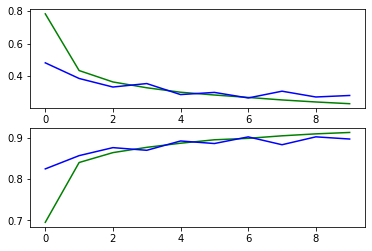

In [ ]:
# plot train and validation loss and acuuracy

fig, ax = plt.subplots(2)
ax[0].plot(np.arange(num_epochs), train_loss_hist, 'g-')
ax[0].plot(np.arange(num_epochs), valid_loss_hist, 'b-')
ax[0].set_title('Loss')

ax[1].plot(np.arange(num_epochs), train_acc_hist, 'g-')
ax[1].plot(np.arange(num_epochs), valid_acc_hist, 'b-')
ax[1].set_title("Accuracy")

plt.show()

In [ ]:
# predict data

model = torch.load('model.pth')

data, label = test[0]
data = data.view(1, 1, 28, 28)
out = model(data)
_, pred = torch.max(out, 1)

print(labels[pred[0]])
img = data.view(28, 28)